In [256]:
# -*- coding: utf-8 -*-
# 读取excel文件
import pandas as pd
#训练集在原始训练集的基础对ID、特征和Value值都一样的样本进行了去重，共去掉6个样本
original_data = pd.read_excel("训练_20180117.xlsx", index_col="ID")

In [257]:
testa_data = pd.read_excel("测试A_20180117.xlsx", index_col="ID")

In [258]:
testb_data = pd.read_excel("测试B_20180117.xlsx", index_col="ID")

In [259]:
#该样本Value值非常小，所以首先删除该样本
original_data = original_data.drop(["NH1835"],axis=0)
print(original_data.info())
#删除测试集中缺失值比较多的列
null_list = []
for column in testb_data.columns:
    m = 300 - testb_data[column].count()
    if m >= 249:
        null_list.append(column)
original_data = original_data.drop(null_list, axis=1)
print(original_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, NH0995 to NH1942
Columns: 5953 entries, TOOL to Value
dtypes: float64(5183), int64(759), object(11)
memory usage: 36.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, NH0995 to NH1942
Columns: 5789 entries, TOOL to Value
dtypes: float64(5056), int64(722), object(11)
memory usage: 35.0+ MB
None


In [260]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
#将测试集A文本转换为整数
encoder = LabelEncoder()
testa_data["TOOL"] = encoder.fit_transform(testa_data["TOOL"])
testa_data["Tool"] = encoder.fit_transform(testa_data["Tool"])
testa_data["TOOL_ID"] = encoder.fit_transform(testa_data["TOOL_ID"])
testa_data["Tool (#1)"] = encoder.fit_transform(testa_data["Tool (#1)"])
testa_data["TOOL (#1)"] = encoder.fit_transform(testa_data["TOOL (#1)"])
testa_data["TOOL (#2)"] = encoder.fit_transform(testa_data["TOOL (#2)"])
testa_data["Tool (#2)"] = encoder.fit_transform(testa_data["Tool (#2)"])
testa_data["Tool (#3)"] = encoder.fit_transform(testa_data["Tool (#3)"])
testa_data["Tool (#4)"] = encoder.fit_transform(testa_data["Tool (#4)"])
testa_data["TOOL (#3)"] = encoder.fit_transform(testa_data["TOOL (#3)"])
testa_data["OPERATION_ID"] = encoder.fit_transform(testa_data["OPERATION_ID"])
#使用中位数填充测试集A数据中的缺失值，如果列为全空，则都使用0填充
for column in testa_data.columns:
    median = testa_data[column].median()
    if testa_data[column].count() == 0:
        median = 0
    testa_data[column] = testa_data[column].fillna(median)

In [261]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
#将测试集B文本转换为整数
encoder = LabelEncoder()
testb_data["TOOL"] = encoder.fit_transform(testb_data["TOOL"])
testb_data["Tool"] = encoder.fit_transform(testb_data["Tool"])
testb_data["TOOL_ID"] = encoder.fit_transform(testb_data["TOOL_ID"])
testb_data["Tool (#1)"] = encoder.fit_transform(testb_data["Tool (#1)"])
testb_data["TOOL (#1)"] = encoder.fit_transform(testb_data["TOOL (#1)"])
testb_data["TOOL (#2)"] = encoder.fit_transform(testb_data["TOOL (#2)"])
testb_data["Tool (#2)"] = encoder.fit_transform(testb_data["Tool (#2)"])
testb_data["Tool (#3)"] = encoder.fit_transform(testb_data["Tool (#3)"])
testb_data["Tool (#4)"] = encoder.fit_transform(testb_data["Tool (#4)"])
testb_data["TOOL (#3)"] = encoder.fit_transform(testb_data["TOOL (#3)"])
testb_data["OPERATION_ID"] = encoder.fit_transform(testb_data["OPERATION_ID"])
#使用中位数填充测试集B数据中的缺失值，如果列为全空，则都使用0填充
for column in testb_data.columns:
    median = testb_data[column].median()
    if testb_data[column].count() == 0:
        median = 0
    testb_data[column] = testb_data[column].fillna(median)

In [262]:
#
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
print(original_data.info())
#删除全空的列
original_data = original_data.dropna(axis=1, how='all')
print(original_data.info())
#将文本转换为整数
encoder = LabelEncoder()
original_data["TOOL"] = encoder.fit_transform(original_data["TOOL"])
original_data["Tool"] = encoder.fit_transform(original_data["Tool"])
original_data["TOOL_ID"] = encoder.fit_transform(original_data["TOOL_ID"])
original_data["Tool (#1)"] = encoder.fit_transform(original_data["Tool (#1)"])
original_data["TOOL (#1)"] = encoder.fit_transform(original_data["TOOL (#1)"])
original_data["TOOL (#2)"] = encoder.fit_transform(original_data["TOOL (#2)"])
original_data["Tool (#2)"] = encoder.fit_transform(original_data["Tool (#2)"])
original_data["Tool (#3)"] = encoder.fit_transform(original_data["Tool (#3)"])
original_data["Tool (#4)"] = encoder.fit_transform(original_data["Tool (#4)"])
original_data["TOOL (#3)"] = encoder.fit_transform(original_data["TOOL (#3)"])
original_data["OPERATION_ID"] = encoder.fit_transform(original_data["OPERATION_ID"])
#使用中位数填充训练数据中的缺失值，如果列为全空，则都使用0填充
for column in original_data.columns:
    median = original_data[column].median()
    if original_data[column].count() == 0:
        median = 0
    original_data[column] = original_data[column].fillna(median)
#删除方差为0的列，即改列的数全一样
var_list = []
for column in original_data.columns:
    if original_data[column].var() == 0:
        var_list.append(column)
original_data = original_data.drop(var_list, axis=1)
print(original_data.info())
#删除训练集和测试集B差距很大的列，是在测试集a的答案出来之后，要预测测试集b的Value值时。
diff_list = []
for column in original_data.columns:
    cnt = 0
    if column != "Value":
        minm = original_data[column].min()
        maxm = original_data[column].max()
        testdata_list = testb_data[column].tolist()
        for data in testdata_list:
            if data>maxm or data<minm:
                cnt = cnt + 1
        if cnt >= 50:
            diff_list.append(column)
print(diff_list)
original_data = original_data.drop(diff_list, axis=1)
print(original_data.info())
#删除训练集和测试集A差距很大的列
diff_list = []
for column in original_data.columns:
    cnt = 0
    if column != "Value":
        minm = original_data[column].min()
        maxm = original_data[column].max()
        testdata_list = testa_data[column].tolist()
        for data in testdata_list:
            if data>maxm or data<minm:
                cnt = cnt + 1
        if cnt >= 50:
            diff_list.append(column)
print(diff_list)
original_data = original_data.drop(diff_list, axis=1)
print(original_data.info())
#将训练集中特征之间的线性相关性很强的只保留一个特征
corr_list = []
temp_list = []
corr_matrix = original_data.corr()
columns = corr_matrix.columns
for column in columns:
    if column in corr_matrix.columns:
        linear_index_z = corr_matrix[corr_matrix[column]>=0.96].index
        linear_index_f = corr_matrix[corr_matrix[column]<=-0.96].index
        linear_index = list(linear_index_z) + list(linear_index_f)
        for index in linear_index:
            if column != index:
                temp_list.append(index)
                corr_list.append(index)
        if len(temp_list) != 0:
            corr_matrix = corr_matrix.drop(temp_list, axis=1)
            corr_matrix = corr_matrix.drop(temp_list, axis=0)
            temp_list = []
print(len(corr_list))
original_data = original_data.drop(corr_list, axis=1)
print(original_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, NH0995 to NH1942
Columns: 5789 entries, TOOL to Value
dtypes: float64(5056), int64(722), object(11)
memory usage: 35.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, NH0995 to NH1942
Columns: 5637 entries, TOOL to Value
dtypes: float64(4904), int64(722), object(11)
memory usage: 34.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, NH0995 to NH1942
Columns: 4979 entries, TOOL to Value
dtypes: float64(4600), int64(379)
memory usage: 30.1+ MB
None
['TOOL', '210X95', '210X204', '210X205', '210X213', '210X215', '220X33', '220X67', '220X71', '220X75', '220X79', '220X83', '220X87', '220X91', '220X95', '220X151', '220X155', '220X163', '220X170', '220X171', '220X172', '220X173', '220X176', '220X179', '220X180', '220X181', '220X182', '220X183', '220X184', '220X185', '220X187', '220X188', '220X189', '220X193', '220X194', '220X195', '220X196', '220X197', '220X204', '220X216', '220X217', '220X218', '220

In [191]:
#使用xgboost进行特征选择，只使用训练集
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#将训练集数据的特征和预测结果分开
original_data_result = original_data["Value"]
original_data_feature = original_data.drop(["Value"], axis=1)

print("fjg")
selector = SelectFromModel(estimator=XGBRegressor(), threshold="6*mean")
selector.fit(original_data_feature, original_data_result)
feature_index_results = selector.get_support(indices=True)
print(feature_index_results)
print(len(feature_index_results))
feature_results = []
feature_names = original_data_feature.columns
for feature_index in feature_index_results:
    feature_results.append(feature_names[feature_index])
print(feature_results)

fjg
[   0    1    3    5    9   26   45   46   48   75   77   79   91   96  102
  105  115  119  132  138  182  189  194  211  225  244  257  301  303  305
  310  311  313  317  343  348  564  568  592  597  615  637  661  718  772
  804  825  855  884  890 1014 1015 1023 1033 1034 1040 1079 1080 1084 1086
 1088 1089 1107 1116 1130 1266 1275 1299 1300 1301 1322]
71
['210X1', '210X2', '210X4', '210X6', '210X10', '210X36', '210X81', '210X82', '210X86', '210X154', '210X158', '210X160', '210X184', '210X190', '210X206', 'ERROR:#N/A_4', '220X3', '220X8', '220X54', '220X141', '310X103', '310X132', '310X151', '310X169', '310X200', '311X52', '311X87', '311X154', '311X182', '311X189', '311X196', '311X197', '311X200', '311X211', '312X51', '312X57', '312X690', '312X694', '312X776', '330X3', '330X109', '330X193', '330X328', '330X597', '340X17', '340X109', '340X188', '360X111', '360X508', '360X582', '420X30', '420X31', '420X73', '420X91', '420X92', '420X99', '420X187', '420X188', '420X200', '420X205

In [263]:
#使用xgboost进行特征选择，使用训练集和测试集a（在测试集a的答案公布之后）
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#将测试集合A和训练集B合并在一起，作为总的训练集，在这个总的训练集上进行特征选择
j_original_data = pd.read_excel("训练_20180117.xlsx", index_col="ID")
j_testa_data = pd.read_excel("测试A_20180117.xlsx", index_col="ID")
j_testa_result = pd.read_csv("[new] fusai_answer_a_20180127.csv", index_col="ID")

j_original_data = j_original_data.drop(["NH1835"],axis=0)

j_testa_data["Value"] = j_testa_result["Value"]
j_train_data = pd.concat([j_original_data, j_testa_data], axis=0)

#将总的训练集中的文本转换为整数
encoder = LabelEncoder()
j_train_data["TOOL"] = encoder.fit_transform(j_train_data["TOOL"])
j_train_data["Tool"] = encoder.fit_transform(j_train_data["Tool"])
j_train_data["TOOL_ID"] = encoder.fit_transform(j_train_data["TOOL_ID"])
j_train_data["Tool (#1)"] = encoder.fit_transform(j_train_data["Tool (#1)"])
j_train_data["TOOL (#1)"] = encoder.fit_transform(j_train_data["TOOL (#1)"])
j_train_data["TOOL (#2)"] = encoder.fit_transform(j_train_data["TOOL (#2)"])
j_train_data["Tool (#2)"] = encoder.fit_transform(j_train_data["Tool (#2)"])
j_train_data["Tool (#3)"] = encoder.fit_transform(j_train_data["Tool (#3)"])
j_train_data["Tool (#4)"] = encoder.fit_transform(j_train_data["Tool (#4)"])
j_train_data["TOOL (#3)"] = encoder.fit_transform(j_train_data["TOOL (#3)"])
j_train_data["OPERATION_ID"] = encoder.fit_transform(j_train_data["OPERATION_ID"])
#使用中位数填充总训练数据中的缺失值，如果列为全空，则都使用0填充
for column in j_train_data.columns:
    median = j_train_data[column].median()
    if j_train_data[column].count() == 0:
        median = 0
    j_train_data[column] = j_train_data[column].fillna(median)
#选取特征属性和Value值
j_train_data = j_train_data[original_data.columns]
j_train_data_result = j_train_data["Value"]
j_train_data_feature = j_train_data.drop(["Value"], axis=1)

print("fjg")
selector = SelectFromModel(estimator=XGBRegressor(), threshold="5*mean")
selector.fit(j_train_data_feature, j_train_data_result)
feature_index_results = selector.get_support(indices=True)
print(feature_index_results)
print(len(feature_index_results))
feature_results = []
feature_names = j_train_data_feature.columns
for feature_index in feature_index_results:
    feature_results.append(feature_names[feature_index])
print(feature_results)

fjg
[   0    1    2    3    6    9   12   18   26   44   45   50   76   78   88
   92   93   95  101  104  112  116  128  153  185  237  242  244  246  248
  294  295  296  299  300  302  306  332  335  337  485  616  625  629  633
  680  688  734  737  817  820  832  847  848  854  857  863  987 1025 1026
 1028 1030 1032 1034 1035 1045 1060 1066 1211 1218 1228 1233 1235 1252 1254
 1283 1289]
77
['210X1', '210X2', '210X3', '210X4', '210X7', '210X10', '210X14', '210X24', '210X36', '210X81', '210X82', '210X89', '210X158', '210X160', '210X180', '210X187', '210X188', '210X190', '210X206', 'ERROR:#N/A_4', '220X3', '220X8', '220X54', '310X8', '310X151', '311X53', '311X70', '311X72', '311X76', '311X86', '311X182', '311X189', '311X192', '311X196', '311X197', '311X200', '311X211', '312X51', '312X54', '312X57', '312X423', '330X188', '330X234', '330X264', '330X294', '330X574', '330X611', '340X11', '340X18', '360X109', '360X131', '360X327', '360X582', '360X584', '360X677', '360X712', '360X971', '4

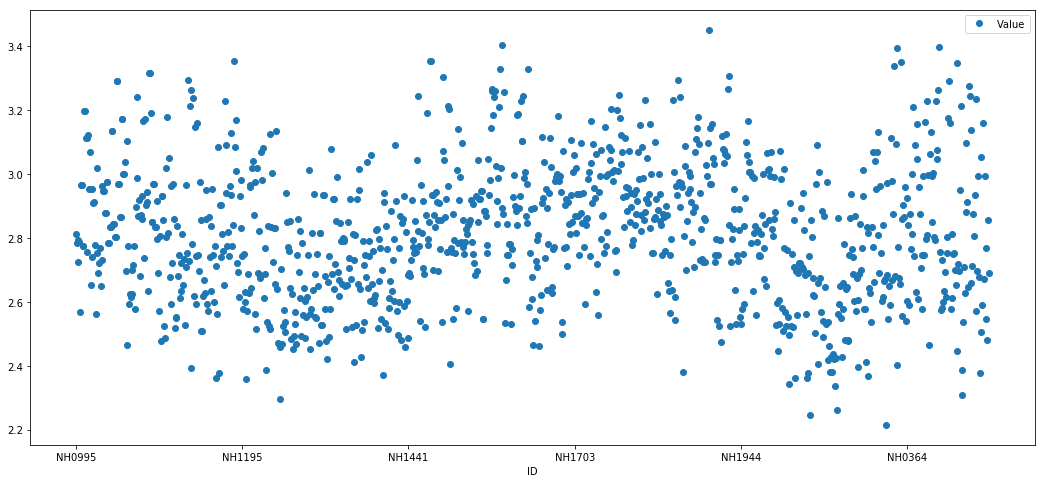

In [153]:
#画出训练集和测试中Value图
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = [18, 8]
testa_result = pd.read_csv("[new] fusai_answer_a_20180127.csv", index_col="ID")
original_data_result_temp = pd.DataFrame(original_data_result, columns=["Value"])
temp_result = pd.concat([original_data_result_temp, testa_result], axis=0)
temp_result.plot(style='o')
pyplot.show()

In [83]:
#临时的代码块
null_list = []
for column in testa_data.columns:
    l = 800 - original_data[column].count()
    m = 300 - testa_data[column].count()
    n = 412 - testb_data[column].count()
    null_list.append([l,m,n])
temp = pd.DataFrame(null_list, index=testa_data.columns, columns=["train", "testa", "testb"])
temp.to_excel("nullcount.xlsx", index=True, header=True)